# Detail Analysis on Astro First Movie Purchase Predictive Analysis

## Introduction
The goal of this analysis is to understand what the variables means, to check and deal with missing values and erroneous data and to determine variables that are significant to the predictive analysis. Since the response, "Purchased Munafik", is categorical, bar charts were chosen to visualise the variables. Bar charts are highly interpretable and the easiest kind of plot to read. 

Choosing the right variables for an algorithm is important in predictive analysis as they affect prediction accuracy. 

## Data Wrangling
Data wrangling is a process to cleaning and unifying a dataset for analysis. For this dataset, duplicate entries were dropped and missing values in Gender was imputed to "Unknown". 

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv(r'C:\Users\Shireen\Desktop\Predictive analysis\Training data for Astro First Munafik.csv')
# Data Wrangling
# Remove duplicated accounts
df.drop_duplicates(inplace=True)
# Impute missing values in 'Gender' to 'Unknown'
df['Gender'] = df['Gender'].fillna('Unknown')

## The Analysis

### Customer Demographics

It is natural to start analysing the demographics of the customers that have purchased the movie Munafik. Race and Gender variables show that the movie was purchased mainly by Malay customers, as it is a Malay movie. A look into Gender variable also show that male customers purchased more than female customers.

<IPython.core.display.Javascript object>


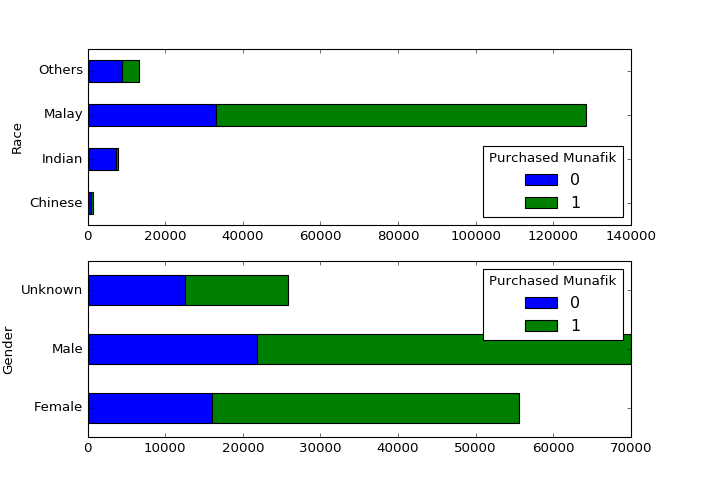

In [3]:
def proportionPurchased(discreteVar):
    by_var = df.groupby([discreteVar,'Purchased Munafik'])
    table = by_var.size().unstack()
    return table

discreteVarList = ['Race', 'Gender']

fig1, axes1 = plt.subplots(2,1)

for i in range(2):
    var = discreteVarList[i]
    table = proportionPurchased(var)
    table.plot(kind='barh', stacked=True, ax=axes1[i])
fig1.show()

This is also confirmed by looking at the split between males and females according to Race, where the pattern is consistent across different races.

<IPython.core.display.Javascript object>


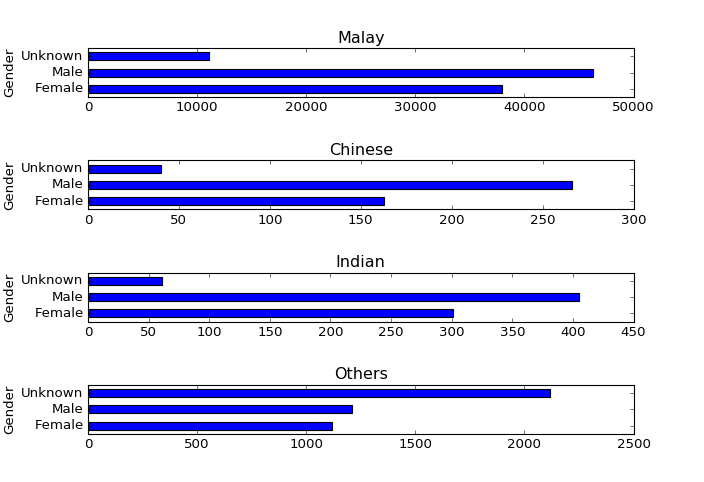

In [4]:
def purchasedbygender(race):
    group = df[(df['Purchased Munafik']==1)&(df['Race']==race)]
    group = group.groupby(['Gender']).size()
    return group

raceList = ['Malay', 'Chinese', 'Indian', 'Others']

fig2, axes2 = plt.subplots(4,1)

for i in range(4):
    var = raceList[i]
    table = purchasedbygender(var)
    table.plot(kind='barh', ax=axes2[i]).set_title(var)

plt.subplots_adjust(wspace=0.4, hspace=1.3)
fig2.show()

#### Purchase Probability

Decision trees model have been applied to the training dataset to identify the purchase probability based on customers demographics.

In [5]:
from sklearn import tree
from sklearn import preprocessing

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()
# Convert Race variable to numeric
encoded_race = label_encoder.fit_transform(df['Race'])
encoded_gender = label_encoder.fit_transform(df['Gender'])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Make data frame of predictors
predictors = pd.DataFrame([encoded_race, encoded_gender]).T

# Train the model
tree_model.fit(X = predictors, 
               y = df["Purchased Munafik"])

# Get purchase probability
preds = tree_model.predict_proba(X = predictors)

# Create a table of predictions by race and gender
pd.crosstab(preds[:,1], columns = [df["Race"], 
                                   df["Gender"]])

Race     Chinese              Indian                Malay                 \
Gender    Female Male Unknown Female  Male Unknown Female   Male Unknown   
row_0                                                                      
0.084722       0    0       0      0     0     720      0      0       0   
0.096063       0    0       0      0  4216       0      0      0       0   
0.099735       0    0       0   3018     0       0      0      0       0   
0.218559       0    0       0      0     0       0      0      0       0   
0.307692       0    0     130      0     0       0      0      0       0   
0.317121     514    0       0      0     0       0      0      0       0   
0.327586       0  812       0      0     0       0      0      0       0   
0.616012       0    0       0      0     0       0      0      0       0   
0.652835       0    0       0      0     0       0      0      0       0   
0.724964       0    0       0      0     0       0      0      0   15238   
0.735104       0    0       0      0     0       0      0  62987       0   
0.754866       0    0       0      0     0       0  50299      0       0   

Race     Others                
Gender   Female  Male Unknown  
row_0                          
0.084722      0     0       0  
0.096063      0     0       0  
0.099735      0     0       0  
0.218559      0     0    9677  
0.307692      0     0       0  
0.317121      0     0       0  
0.327586      0     0       0  
0.616012      0  1961       0  
0.652835   1711     0       0  
0.724964      0     0       0  
0.735104      0     0       0  
0.754866      0     0       0

The purchase probability shows that the highest purchase probabilities are by Malay customers, where 73.5% of male Malay customers and 75.48% of female Malay customers would purchase Munafik.

### Purchase Time Period

Astro First and Astro Best purchase variables reveal that most customers purchased Munafik during the fourth quarter of 2015. The bar plots only account the number of customers that did purchase Astro First and Astro Best movies at least once.

<IPython.core.display.Javascript object>


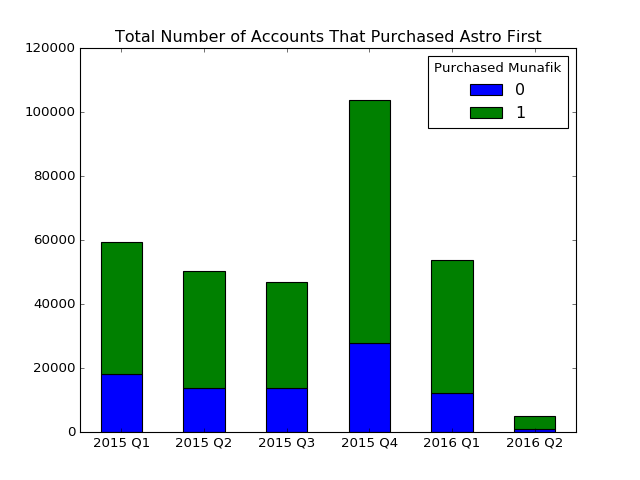

In [5]:
def purchasesperiod(period):
    group = df[(df[period]>0)]
    group = group.groupby(['Purchased Munafik']).size()
    return group

periodList = ['Astro First 2015 Q1 purchases','Astro First 2015 Q2 purchases','Astro First 2015 Q3 purchases',
             'Astro First 2015 Q4 purchases','Astro First 2016 Q1 purchases','Astro First 2016 Q2 purchases']

gr = pd.DataFrame()
for i in range(6):
    var = periodList[i]
    gr[var] = purchasesperiod(var)

gr.columns= ['2015 Q1','2015 Q2','2015 Q3','2015 Q4','2016 Q1','2016 Q2']
gr = gr.transpose()
gr.plot(kind='bar', stacked=True, rot=0,title='Total Number of Accounts That Purchased Astro First')

<IPython.core.display.Javascript object>


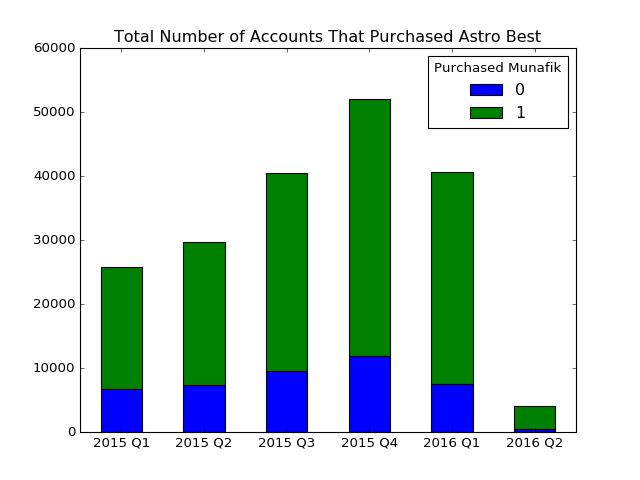

In [6]:
periodList = ['Astro Best 2015 Q1 purchases','Astro Best 2015 Q2 purchases','Astro Best 2015 Q3 purchases',
             'Astro Best 2015 Q4 purchases','Astro Best 2016 Q1 purchases','Astro Best 2016 Q2 purchases']

gr = pd.DataFrame()
for i in range(6):
    var = periodList[i]
    gr[var] = purchasesperiod(var)

gr.columns= ['2015 Q1','2015 Q2','2015 Q3','2015 Q4','2016 Q1','2016 Q2']
gr = gr.transpose()
gr.plot(kind='bar', stacked=True, rot=0,title='Total Number of Accounts That Purchased Astro Best')

### Subscription to Particular Packages/Services

Finally, from the packages/services subscription variables, it shows that most customers that did purchase Munafik, did not have Value Pack and Super Pack. However, a large number of Astro on the Go (AOTG) subscribers did purchase Munafik.

<IPython.core.display.Javascript object>


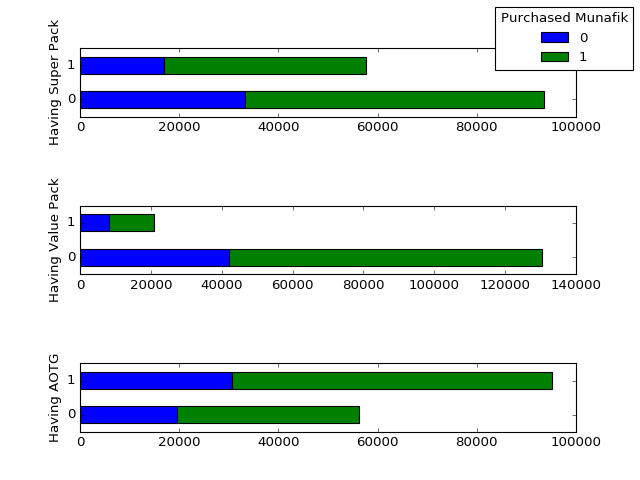

In [7]:
def servicePurchased(discreteVar):
    by_var = df.groupby([discreteVar,'Purchased Munafik'])
    table = by_var.size().unstack()
    return table

discreteVarList = ['Having Super Pack', 'Having Value Pack', 'Having AOTG']

fig4, axes4 = plt.subplots(3,1)

for i in range(3):
    var = discreteVarList[i]
    table = servicePurchased(var)
    table.plot(kind='barh', stacked=True, ax=axes4[i],legend=False)

#handles = plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.5),prop={'size':12})
handles = axes4[0].get_legend_handles_labels()
plt.figlegend(handles[0], ['0', '1'], title='Purchased Munafik',loc='upper right',prop={'size':12})
plt.subplots_adjust(hspace=1.3)
fig4.show()

## Conclusion

In conclusion, the visualisation of the training dataset reveals a particular pattern in purchasing the movie Munafik. Firstly,
most customers that purchased the movie were Malay and male. Secondly, the movie was particularly purchased during the fourth quarter of 2015. Finally, a large number of customers that did purchase it did not have Value Pack, although a high number of customers with AOTG purchased the movie. Therefore the most significant variables in this dataset are Race, Gender, Astro First 2015 Q4 purchases, Astro Best 2015 Q4 purchases, Having Value Pack and Having AOTG. These variables can be used for the prediction analysis with Random Forest for the test data.